# Fire Incidents - Max Pietras

My dataset is fire incidents in Pittsburgh. It lists the type, neighborhood, time, zone, and address of all fire incidents from 2017 to August 2022. I want to look at the number of fire incidents in each neighborhood to determine which would be the safest by having the least fires compared to the overall population of the neighborhood. I first use pd.read_csv() to read out the data. 

In [2]:
import pandas as pd
fire = pd.read_csv("fire.csv")
fire


,call_no,incident_type,type_description,address,alarm_time,alarms,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",2016-04-21T05:01:04,1,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-16,40.441275,-79.882485
1,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",2018-03-13T08:34:43,1,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.436342,-79.881003
2,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",2018-03-13T11:54:23,0,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",2017-05-31T08:39:47,0,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",2018-03-09T10:26:42,1,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8922,F220082010,130.0,"Mobile property (vehicle) fire, Other","4400 BLOCK BROWNS HILL RD, PITTSBURGH PA 15218",2022-11-03T17:46:47,0,231EN19,1517.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2-12,NaN,NaN
8923,F220082038,113.0,"Cooking fire, confined to container","600 BLOCK HOLLACE ST, PITTSBURGH PA 15211",2022-11-03T19:13:44,1,231EN10,501.0,Middle Hill,6.0,5.0,4.200305e+10,3.0,5.0,2.0,2-5,40.449953,-79.967408
8924,F220082248,111.0,Building fire,"2400 BLOCK WATERMAN AVE, PITTSBURGH PA 15227",2022-11-04T12:35:38,1,231EN23,2904.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-15,NaN,NaN
8925,F220082275,142.0,Brush or brush-and-grass mixture fire,"100 BLOCK REDLYN ST, PITTSBURGH PA 15223",2022-11-04T14:22:12,0,231EN23,3001.0,Knoxville,3.0,30.0,4.200330e+10,5.0,30.0,3.0,4-7,40.413520,-79.991463


Here we can see there is a lot of information we don't need. By only looking at the number of fire incidents, I really only need one column, neighborhoods. I show neighborhoods and incident type because later I will see the distribution of the types of fires.

In [3]:
data = pd.read_csv("fire.csv", index_col="neighborhood", parse_dates=True)
del data["police_zone"]
del data["call_no"]
del data["address"]
del data["alarm_time"]
del data["alarms"]
del data["primary_unit"]
del data["census_tract"]
del data["ward"]
del data["council_district"]
del data["tract"]
del data["public_works_division"]
del data["pli_division"]
del data["fire_zone"]
del data["latitude"]
del data["longitude"]
del data["incident_type"]

data

,type_description
neighborhood,
NaN,Building fire
NaN,Building fire
NaN,Passenger vehicle fire
Fineview,Passenger vehicle fire
Fairywood,Building fire
...,...
NaN,"Mobile property (vehicle) fire, Other"
Middle Hill,"Cooking fire, confined to container"
NaN,Building fire


This looks much better and we now see only the neighborhoods and their incident type. "NaN" will pop up as the listed neighborhood multiple times. There is not much we can do about that so I will be ignoring any data with "NaN" as the neighborhood.

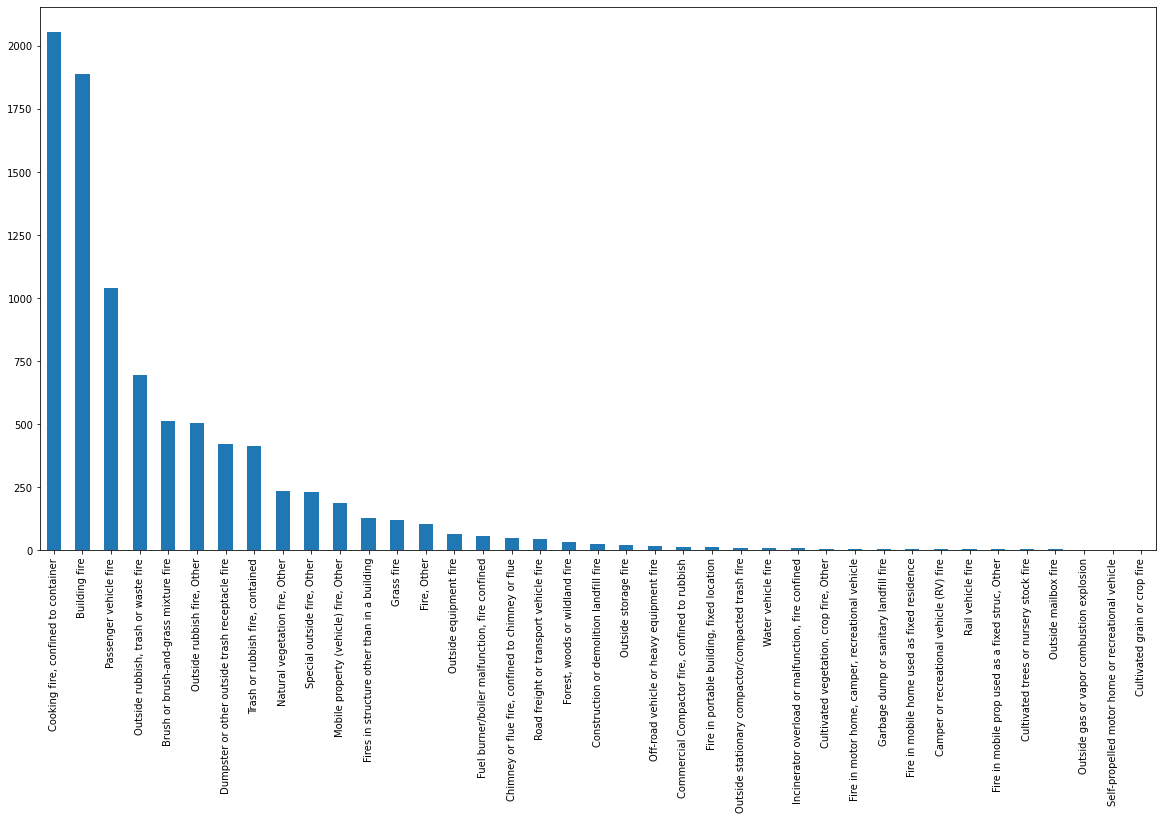

In [4]:
data3 = data['type_description'].value_counts()
data3.plot.bar(figsize = (20,10))

Here I am checking whether or not I should weigh the types of fires as well as their prevalance in each neighborhood. I came to the conclusion that since 26 of the types of fire incidents have less that 100 occurences, I will just be looking at the total amount of fire incidents in each neighborhood.

 _____________________________________________________________________________________

Looking at the total number of fire incidents in each neighborhood using .value_counts(), I see that Carrick, the Central Business District, Squirrel Hill South, South Side Flats, and Hazelwood have had the most fire incidents in the past 5 years. St. Clair, East Carnegie, Mt. Oliver, Regent Square, and Mount Oliver Borough have had the least incidents. I will then plot a bar graph displaying the total number of fires in all neighborhoods.

In [4]:
data2 = fire['neighborhood'].value_counts()
data2

Carrick                      275
Central Business District    247
Squirrel Hill South          242
South Side Flats             239
Hazelwood                    230
                            ... 
St. Clair                     11
East Carnegie                 11
Mt. Oliver                    11
Regent Square                  8
Mount Oliver Borough           6
Name: neighborhood, Length: 91, dtype: int64

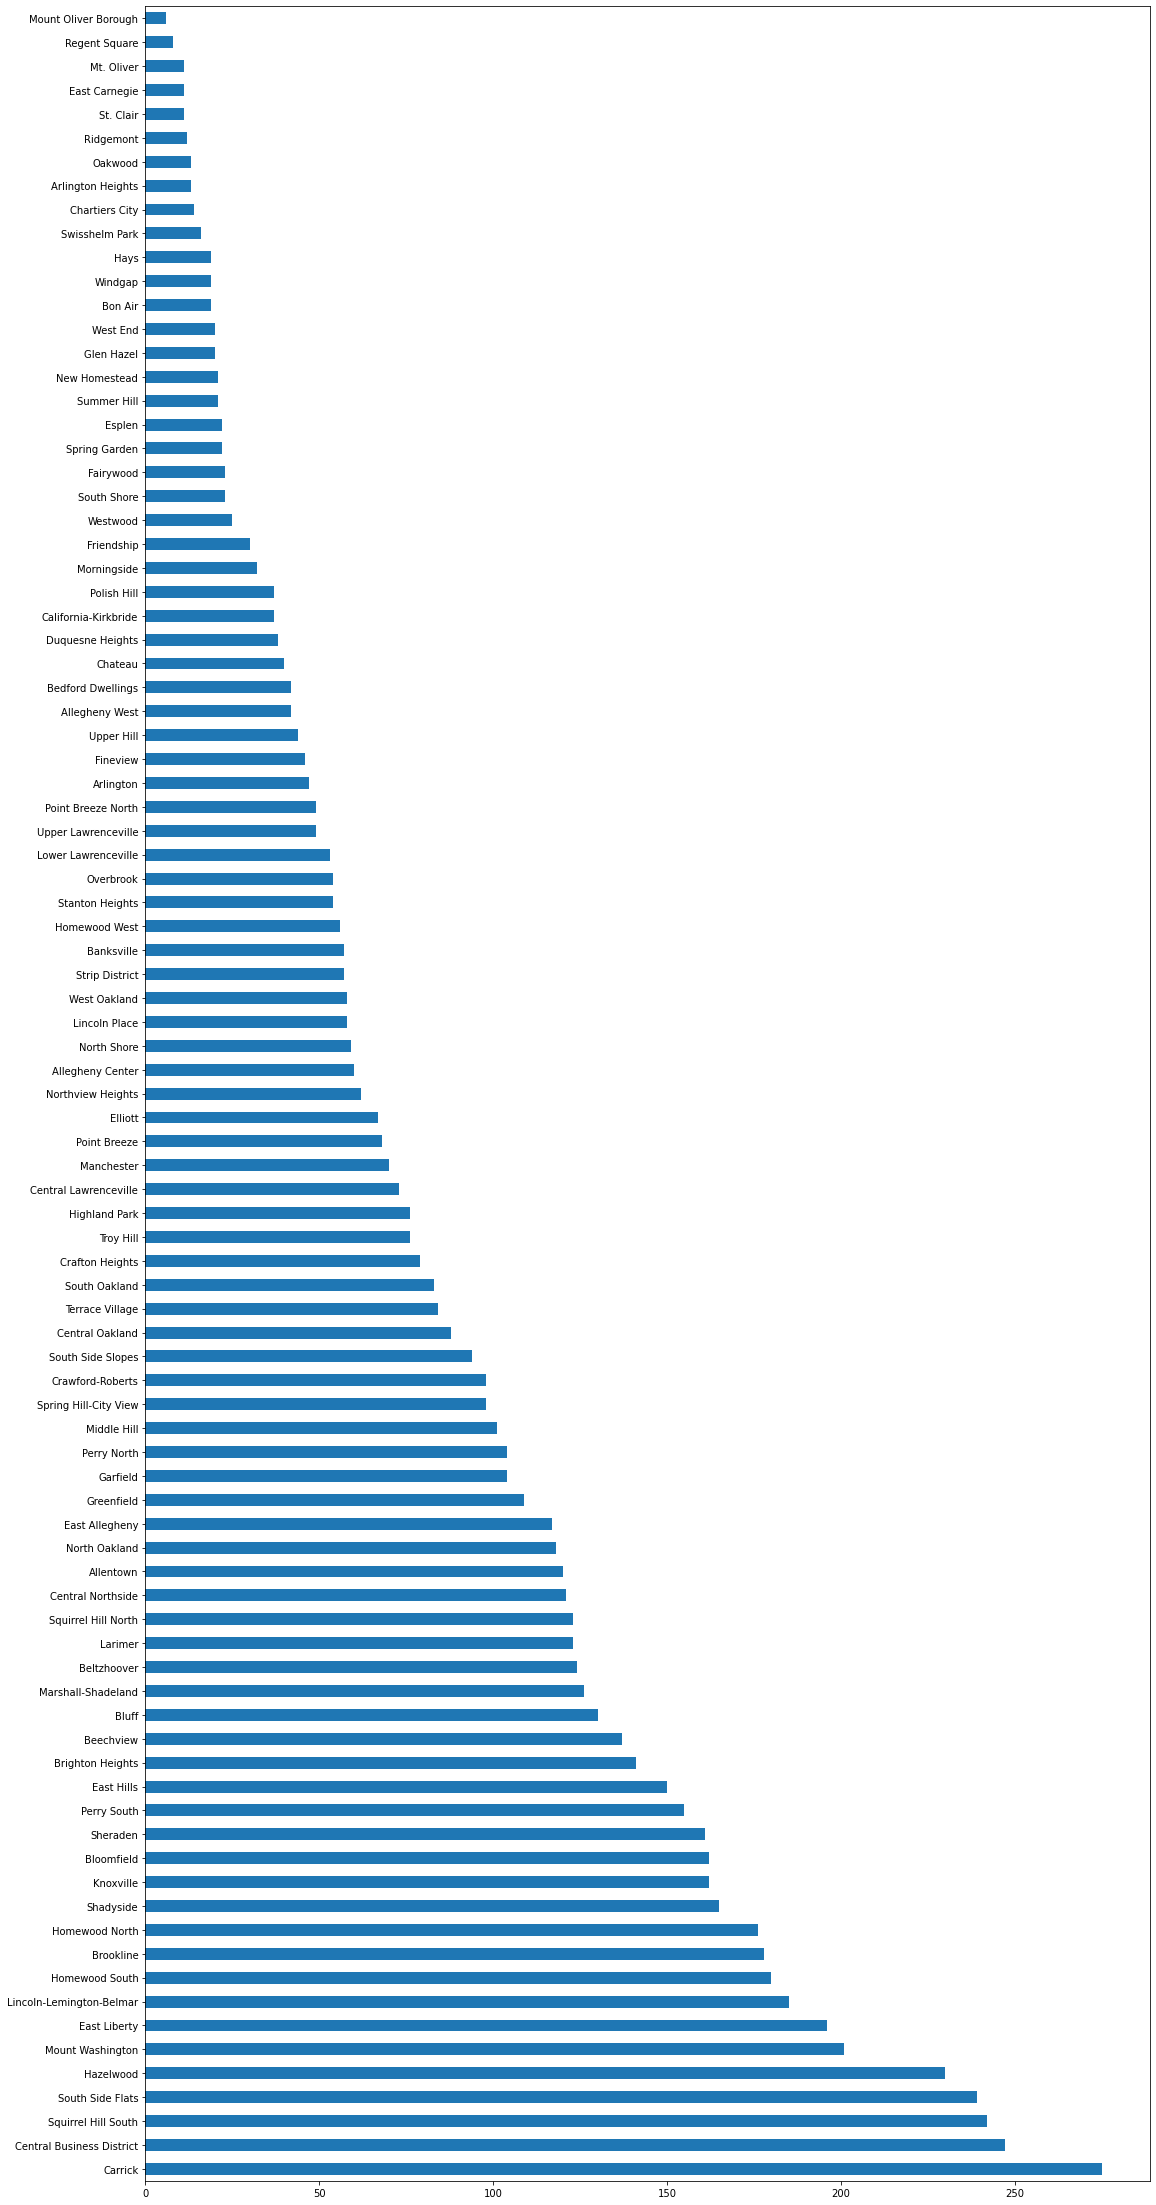

In [5]:
data2.plot.barh(figsize = (18,40))

We cannot determine the best neighborhood for fire safety on this data alone. Some neighborhoods are much larger than others, and naturally there will be more fires in bigger neighborhoods with more people and buildings. To figure out which neighboorhood is the best for fire safety, we need to look at the total number of fire incidents compared to the total population.

In [7]:
pop = pd.read_csv("pop.csv")
pop

,Neighborhood,2010_Total_Population,2010_OneRace_Population,2010_White_Alone_Population,2010_Black_Alone_Population,2010_American_Indian_and_Alaska_Native_alone_population,2010_Asian_Alone_Population,2010_Native_Hawaiian_and_Other_Pacific_Islander_alone_Populatio,2010_Any_other_single_race_alone_Popualtion,2010_Population_two_or_more_races,...,Change_2010_to_2020_Total_Population,Change_2010_to_2020_OneRace_Population,Change_2010_to_2020_White_Alone_Population,Change_2010_to_2020_Black_Alone_Population,Change_2010_to_2020_American_Indian_and_Alaska_Native_alone_pop,Change_2010_to_2020_Asian_Alone_Population,Change_2010_to_2020_Native_Hawaiian_and_Other_Pacific_Islander_,Change_2010_to_2020_Any_other_single_race_alone_Popualtion,Change_2010_to_2020_Population_two_or_more_races,Change_2010_to_2020_Hispanic_or_Latino_Population
0,Allegheny Center,933,896,381,453,4,56,1,1,37,...,486,441,302,-63,4,179,0,19,45,23
1,Allegheny West,462,448,354,84,1,7,0,2,14,...,78,45,72,-52,0,9,1,15,33,28
2,Allentown,2500,2384,1485,878,9,1,0,11,116,...,-195,-258,-213,-93,-6,18,6,30,63,23
3,Arlington - Arlington Heights (Combined),2113,2042,1452,576,9,3,0,2,71,...,-73,-153,-246,44,-4,9,0,44,80,39
4,Banksville,4144,4053,3651,169,2,211,0,20,91,...,-17,-197,-460,25,5,174,2,57,180,102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Upper Lawrenceville,2669,2590,1754,751,10,37,1,37,79,...,-275,-324,264,-597,-5,37,-1,-22,49,-17
85,West End,254,235,135,95,0,2,0,3,19,...,-49,-55,-17,-45,1,4,2,0,6,10
86,West Oakland,2604,2558,1373,1003,7,169,0,6,46,...,-70,-103,159,-395,-1,28,2,104,33,51
87,Westwood,3066,2980,2535,250,3,174,1,17,86,...,266,167,-339,28,0,418,1,59,99,78


Here is a population dataset that I trim down to just the neighborhood and its population in 2020. I will use these numbers combined with fire incidents to determine the safest neighborhood regarding fires. 

In [8]:
pop2 = pop[["Neighborhood", "2020_Total_Population"]]

pop2

,Neighborhood,2020_Total_Population
0,Allegheny Center,1419
1,Allegheny West,540
2,Allentown,2305
3,Arlington - Arlington Heights (Combined),2040
4,Banksville,4127
...,...,...
84,Upper Lawrenceville,2394
85,West End,205
86,West Oakland,2534
87,Westwood,3332


After putting everything into a dataset and dividing fires by population, I multiply the average by 100 for the purpose of readability. I trim the dataset down to only look at the neighborhoods and their average x 100.

In [9]:
div = pd.read_csv("div.csv")
div

,Neighborhood,Fires,Population,Average,Average x 100
0,Allegheny Center,60,1419,0.042283,4.228330
1,Allegheny West,42,540,0.077778,7.777778
2,Allentown,120,2305,0.052061,5.206074
3,Arlington,47,2040,0.023039,2.303922
4,Banksville,57,4127,0.013811,1.381149
...,...,...,...,...,...
84,Upper Lawrenceville,49,2394,0.020468,2.046784
85,West End,20,205,0.097561,9.756098
86,West Oakland,58,2534,0.022889,2.288871
87,Westwood,25,3332,0.007503,0.750300


In [12]:
df2 = div[['Neighborhood', 'Average x 100']]
df2

,Neighborhood,Average x 100
0,Allegheny Center,4.228330
1,Allegheny West,7.777778
2,Allentown,5.206074
3,Arlington,2.303922
4,Banksville,1.381149
...,...,...
84,Upper Lawrenceville,2.046784
85,West End,9.756098
86,West Oakland,2.288871
87,Westwood,0.750300


Before plotting I sort the values so the graph goes in order.

In [13]:
df3= df2.sort_values('Average x 100',ascending=False)
df3

,Neighborhood,Average x 100
20,Chateau,210.526316
69,South Shore,79.310345
55,North Shore,19.601329
88,Windgap,14.179104
85,West End,9.756098
...,...,...
66,Shadyside,1.077234
74,Squirrel Hill North,1.035441
50,Morningside,0.984010
64,Regent Square,0.823893


As we can see, the top 5 neighborhoods with the lowest fire to population ratio are Westwood, Regent Square, Morningside, Squirrel Hill North, and Shadyside.

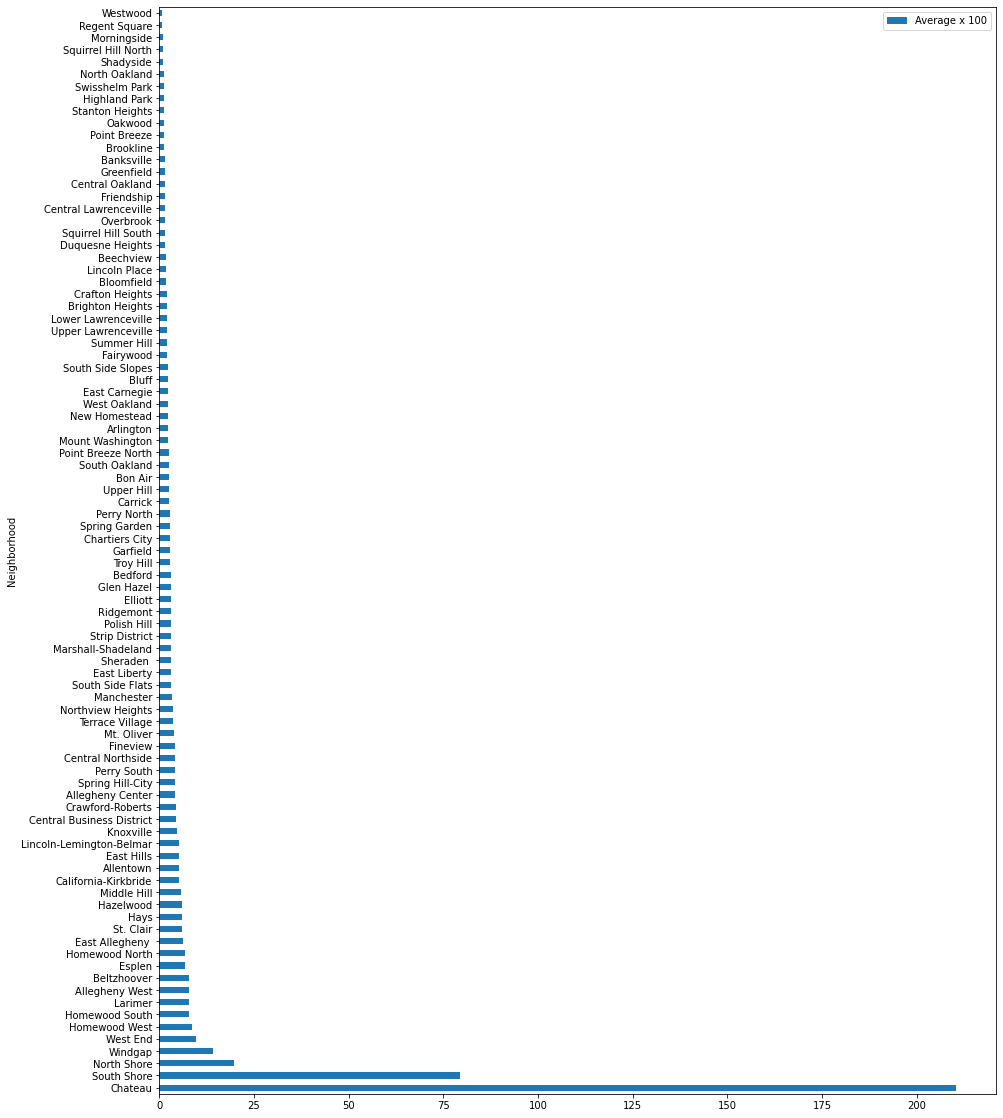

In [27]:
df3.plot.barh(x = "Neighborhood", y = "Average x 100", figsize = (15,20))

# Conclusion

Based on the data, I have determined that Westwood is the best neighborhood. It has the lowest ratio, and even though its ratio is not far from the neighborhoods that come after it, its overall low fire incident count compared with its size would make me comfortable being in Westwood and not worrying about fires.